In [1]:
# ysa_mnist.ipynb
from keras.datasets import mnist


2022-10-26 17:15:03.375365: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-26 17:15:03.375563: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
rakam=62
rakam_veri=train_images[rakam]
print(rakam_veri.shape)
print(type(rakam_veri))

(28, 28)
<class 'numpy.ndarray'>


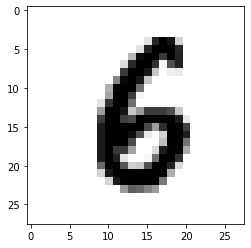

6


In [5]:
import matplotlib.pyplot as plt
plt.imshow(rakam_veri,cmap=plt.cm.binary)
plt.show()
print(train_labels[rakam])

In [ ]:
print(rakam_veri)

In [7]:
from keras import models
from keras import layers

In [8]:
network=models.Sequential()

2022-10-26 17:16:32.665097: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-26 17:16:32.673735: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-26 17:16:32.673809: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (serkan-pc): /proc/driver/nvidia/version does not exist
2022-10-26 17:16:32.747062: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))#giriş kartmanı ve 1. gizli katman
network.add(layers.Dense(128,activation="relu"))#2. gizli katman
network.add(layers.Dense(128,activation="relu"))#3. gizli katman
network.add(layers.Dense(10,activation="softmax")) #son/çıkış katmanı)

In [10]:
network.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [11]:
train_images=train_images.reshape(60000,28*28)
train_images=train_images.astype("float32")/255


In [12]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels)

In [13]:
network.fit(train_images,train_labels,epochs=10,batch_size=128)

2022-10-26 17:23:35.143648: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
469/469 [==============================] - 16s 30ms/step - loss: 0.2462 - accuracy: 0.9250
Epoch 2/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0901 - accuracy: 0.9714
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0600 - accuracy: 0.9809
Epoch 4/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0446 - accuracy: 0.9860
Epoch 5/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0342 - accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0261 - accuracy: 0.9920
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0219 - accuracy: 0.9932
Epoch 8/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0184 - accuracy: 0.9944
Epoch 9/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0144 - accuracy: 0.9954
Epoch 10/10
469/469 [==============================] - 14s 30ms/step - loss: 0.013

In [14]:
network.save("mnist_ann.h5")

In [15]:
import cv2

In [16]:
resim=cv2.imread("/home/serkan/Belgeler/yillar/2022-2023/2022-oyg2-a2/yapay_zeka/rakam.png")

In [17]:
print(resim.shape)

(28, 28, 3)


In [18]:
# resim gri tonlamalı yapıya dönüştürelim(bu satır bir kere çalıştırılabilir)
resim_gri=cv2.cvtColor(resim,cv2.COLOR_BGR2GRAY)

In [19]:
print(resim_gri.shape)

(28, 28)


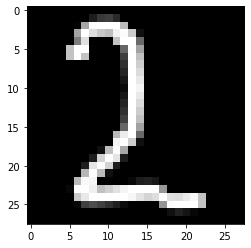

In [21]:
import matplotlib.pyplot as plt
plt.imshow(resim_gri,cmap=plt.cm.binary)
plt.show()

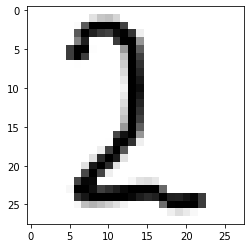

In [22]:
resim_gri_ters=cv2.bitwise_not(resim_gri)
plt.imshow(resim_gri_ters,cmap=plt.cm.binary)
plt.show()


In [23]:
cizim=resim_gri_ters.reshape((-1,28*28))
cizim=cizim.astype("float32")/255

In [26]:
import numpy as np
tahmin=network.predict(cizim)
print(tahmin)
print(f"tahmin={np.argmax(tahmin)}")


1/1 [==============================] - 0s 20ms/step
[[8.8439835e-22 3.7226125e-24 1.0000000e+00 2.1734954e-15 0.0000000e+00
  2.4035017e-22 1.0853995e-21 4.3285973e-24 6.0643426e-21 1.7316229e-26]]
tahmin=2


In [ ]:
import cv2 
import numpy as np

def tahmin_et(yol:str,network)->int:
    resim=cv2.imread(yol)
    resim=cv2.cvtColor(resim,cv2.COLOR_BGR2GRAY)
    resim=cv2.bitwise_not(resim)
    resim=resim.reshape((-1,28*28))
    resim=resim.astype("float32")/255
    tahmin=network.predict(resim)
    tahmin=np.argmax(tahmin)
    return int(tahmin)
